<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

# Data Analytics Basics in Python Series 

### Michael Pyrcz, Professor, The University of Texas at Austin 

*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

#### 2D Slicing of 3D ndarrays Regular Gridded Data Structures / More ndarrays in Python for Engineers and Geoscientists 

This is a tutorial for / demonstration of **Regular Gridded Data Structures in Python**.  In Python, a common tool for dealing with Regular Gridded Data Structures is the *ndarray* from the **NumPy Python package**

* Harris, C.R., Millman, K.J., van der Walt, S.J. et al. Array programming with NumPy. Nature 585, 357–362 (2020). DOI: 0.1038/s41586-020-2649-2. [Nature paper](https://www.nature.com/articles/s41586-020-2649-2)

This tutorial includes the methods and operations that would commonly be required for Engineers and Geoscientists working with Regularly Gridded Data Structures for the purpose of:

1. Data Checking and Cleaning
2. Data Mining / Inferential Data Analysis
3. Predictive Modeling

for Data Analytics, Geostatistics and Machine Learning.

##### Gridded Data Structures

In Python we commonly store our data in two formats, tables and arrays. For sample data with typically multiple features $1,\ldots,m$ over $1,\ldots,n$ samples we will work with tables. For exhaustive 2D maps and 3D models (usually representing a single feature) on a regular grid over $[1,\ldots,n_{1}], [1,\ldots,n_{2}],\ldots,[1,\ldots,n_{dim}]$, where $n_{dim}$ is the number of dimensions, we will work with arrays. 

* It is always possible to add another dimension to our array to include multiple features, $1,\ldots,m$, over all locations, and to work in 2D, 3D, and beyond!

|              | $ix = 0$    | $ix = 1$    |        | $ix = n_x - 1$  |
| -----------  | ----------- | ----------- | ----------- | ---------  |
| $iy = 0$     | $z[iy,ix]$  | $z[iy,ix]$  | $\ldots$   | $z[iy,ix]$ |
| $iy = 1$     | $z[iy,ix]$  | $z[iy,ix]$  | $\ldots$   | $z[iy,ix]$ |
| $\ldots$     | $\ldots$    | $\ldots$    | $\ldots$   | $\ldots$   |
| $iy = n_y-1$ | $z[iy,ix]$  | $z[iy,ix]$  | $\ldots$   | $z[iy,ix]$ |

In geostatistical workflows the tables are typically sample data from wells and drill holes and the grids are the interpolated or simulated models or secondary data from sources such as seismic inversion.

The NumPy package provides a convenient *ndarray* object for working with regularly gridded data. In the following tutorial we will focus on practical methods with *ndarray*s.  There is another section available on Tabular Data Structures that focuses on DataFrames at https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/PythonDataBasics_DataFrame.ipynb.
    
#### 3D Grid Convention in NumPy

Given an 3D ndarray of form:

\begin{equation}
array[a,b,c]
\end{equation}

we see that:

a - depth, into the page
b - height, 000 azimuth 
c - width, 090 azimuth

Given this convention, we assign the following to be consistent with GeoDAS grid formats.

\begin{equation}
array[nz,ny,nx]
\end{equation}

Now what about the ordering?


#### Slicing ndarrays to Make 2D Sections of a 3D ndarray 

Many may find the indexing and slicing confusing. To help out, I visualize the default convention and then show a method to control the order.

#### Load the required libraries

The following code loads the required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.spatial as sp  # for fast nearest neighbor search
import numpy.linalg as linalg  # for linear algebra
import geostatspy.GSLIB as GSLIB
cmap = plt.cm.inferno

#### The 2D Slicing Default

Let's make a simple 3D ndarray and store the ix, iy and iz indices in separate 3D arrays.

* This way we can clearly see the ordering in the results.

* Note, I have reverse the y and z orders to convert from 

In [5]:
ticks=[0,1,2]

testx = np.zeros((3,3,3)); testy = np.zeros((3,3,3)); testz = np.zeros((3,3,3))
i = 1
for iz in range(0,3):
    iiz = 3 - iz - 1
    for iy in range(0,3):
        iiy = 3 - iy - 1
        for ix in range(0,3):
            testx[iiz,iiy,ix] = ix
            testy[iiz,iiy,ix] = iy
            testz[iiz,iiy,ix] = iz
            i = i +1

Now let's visualize the default slices.

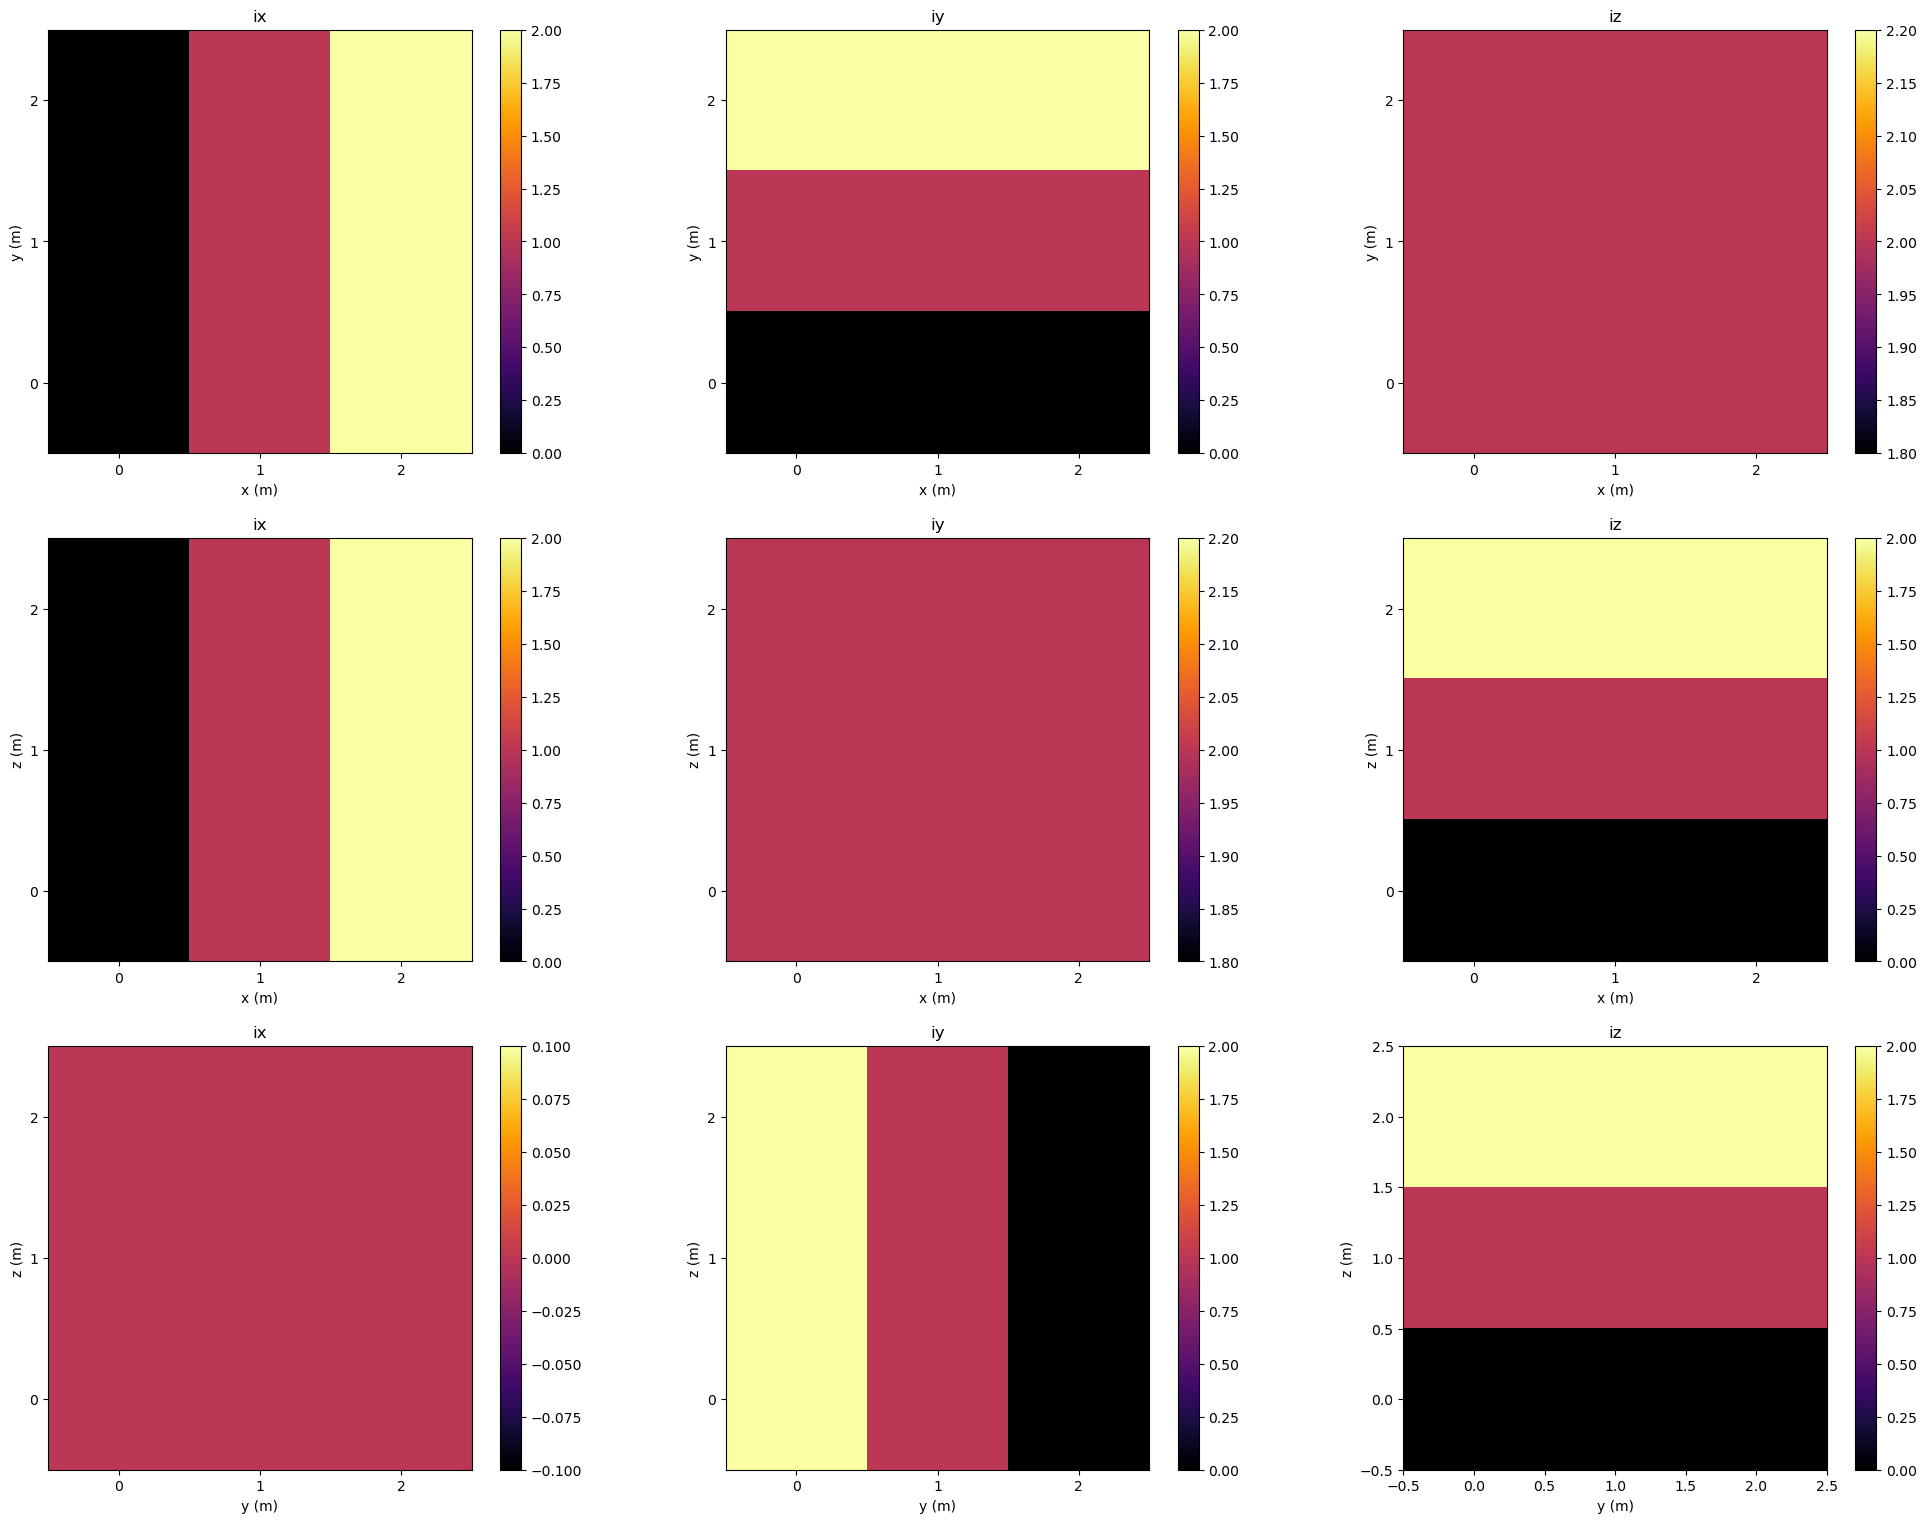

In [8]:
plt.subplot(331) # x - y slices
plt.imshow(testx[0,:,:],extent=[-0.5, 2.5,-0.5,2.5],cmap = cmap); plt.colorbar(); plt.title('ix'); plt.xlabel('x (m)'); plt.ylabel('y (m)')
plt.gca().set_xticks(ticks); plt.gca().set_yticks(ticks)

plt.subplot(332)
plt.imshow(testy[0,:,:],extent=[-0.5, 2.5,-0.5,2.5],cmap = cmap); plt.colorbar(); plt.title('iy'); plt.xlabel('x (m)'); plt.ylabel('y (m)')
plt.gca().set_xticks(ticks); plt.gca().set_yticks(ticks)

plt.subplot(333); 
plt.imshow(testz[0,:,:],extent=[-0.5, 2.5,-0.5,2.5],cmap = cmap); plt.colorbar(); plt.title('iz'); plt.xlabel('x (m)'); plt.ylabel('y (m)')
plt.gca().set_xticks(ticks); plt.gca().set_yticks(ticks)

plt.subplot(334) # x - z slices
plt.imshow(testx[:,0,:],extent=[-0.5, 2.5,-0.5,2.5],cmap = cmap); plt.colorbar(); plt.title('ix'); plt.xlabel('x (m)'); plt.ylabel('z (m)')
plt.gca().set_xticks(ticks); plt.gca().set_yticks(ticks)

plt.subplot(335)
plt.imshow(testy[:,0,:],extent=[-0.5, 2.5,-0.5,2.5],cmap = cmap); plt.colorbar(); plt.title('iy'); plt.xlabel('x (m)'); plt.ylabel('z (m)')
plt.gca().set_xticks(ticks); plt.gca().set_yticks(ticks)

plt.subplot(336)
plt.imshow(testz[:,0,:],extent=[-0.5, 2.5,-0.5,2.5],cmap = cmap); plt.colorbar(); plt.title('iz'); plt.xlabel('x (m)'); plt.ylabel('z (m)')
plt.gca().set_xticks(ticks); plt.gca().set_yticks(ticks)

plt.subplot(337) # y - z slices
plt.imshow(testx[:,:,0],extent=[-0.5, 2.5,-0.5,2.5],cmap = cmap); plt.colorbar(); plt.title('ix'); plt.xlabel('y (m)'); plt.ylabel('z (m)')
plt.gca().set_xticks(ticks); plt.gca().set_yticks(ticks)

plt.subplot(338)
plt.imshow(testy[:,:,0],extent=[-0.5, 2.5,-0.5,2.5],cmap = cmap); plt.colorbar(); plt.title('iy'); plt.xlabel('y (m)'); plt.ylabel('z (m)')
plt.gca().set_xticks(ticks); plt.gca().set_yticks(ticks)

plt.subplot(339)
plt.imshow(testz[:,:,0],extent=[-0.5, 2.5,-0.5,2.5],cmap = cmap); plt.colorbar(); plt.title('iz'); plt.xlabel('y (m)'); plt.ylabel('z (m)')

plt.subplots_adjust(left=0.0, bottom=0.0, right=3., top=3.0, wspace=0.2, hspace=0.2); plt.show()

#### Correct the Slices

See that the the y-z slice has the y values increasing in the wrong direction, right to left instead of left to right.

* We correct this by reversing the index for y for this slice

```python
testy[:,::-1,0]
```

instead of 


```python
testy[:,:,0]
```

Now all of our slices are correct.

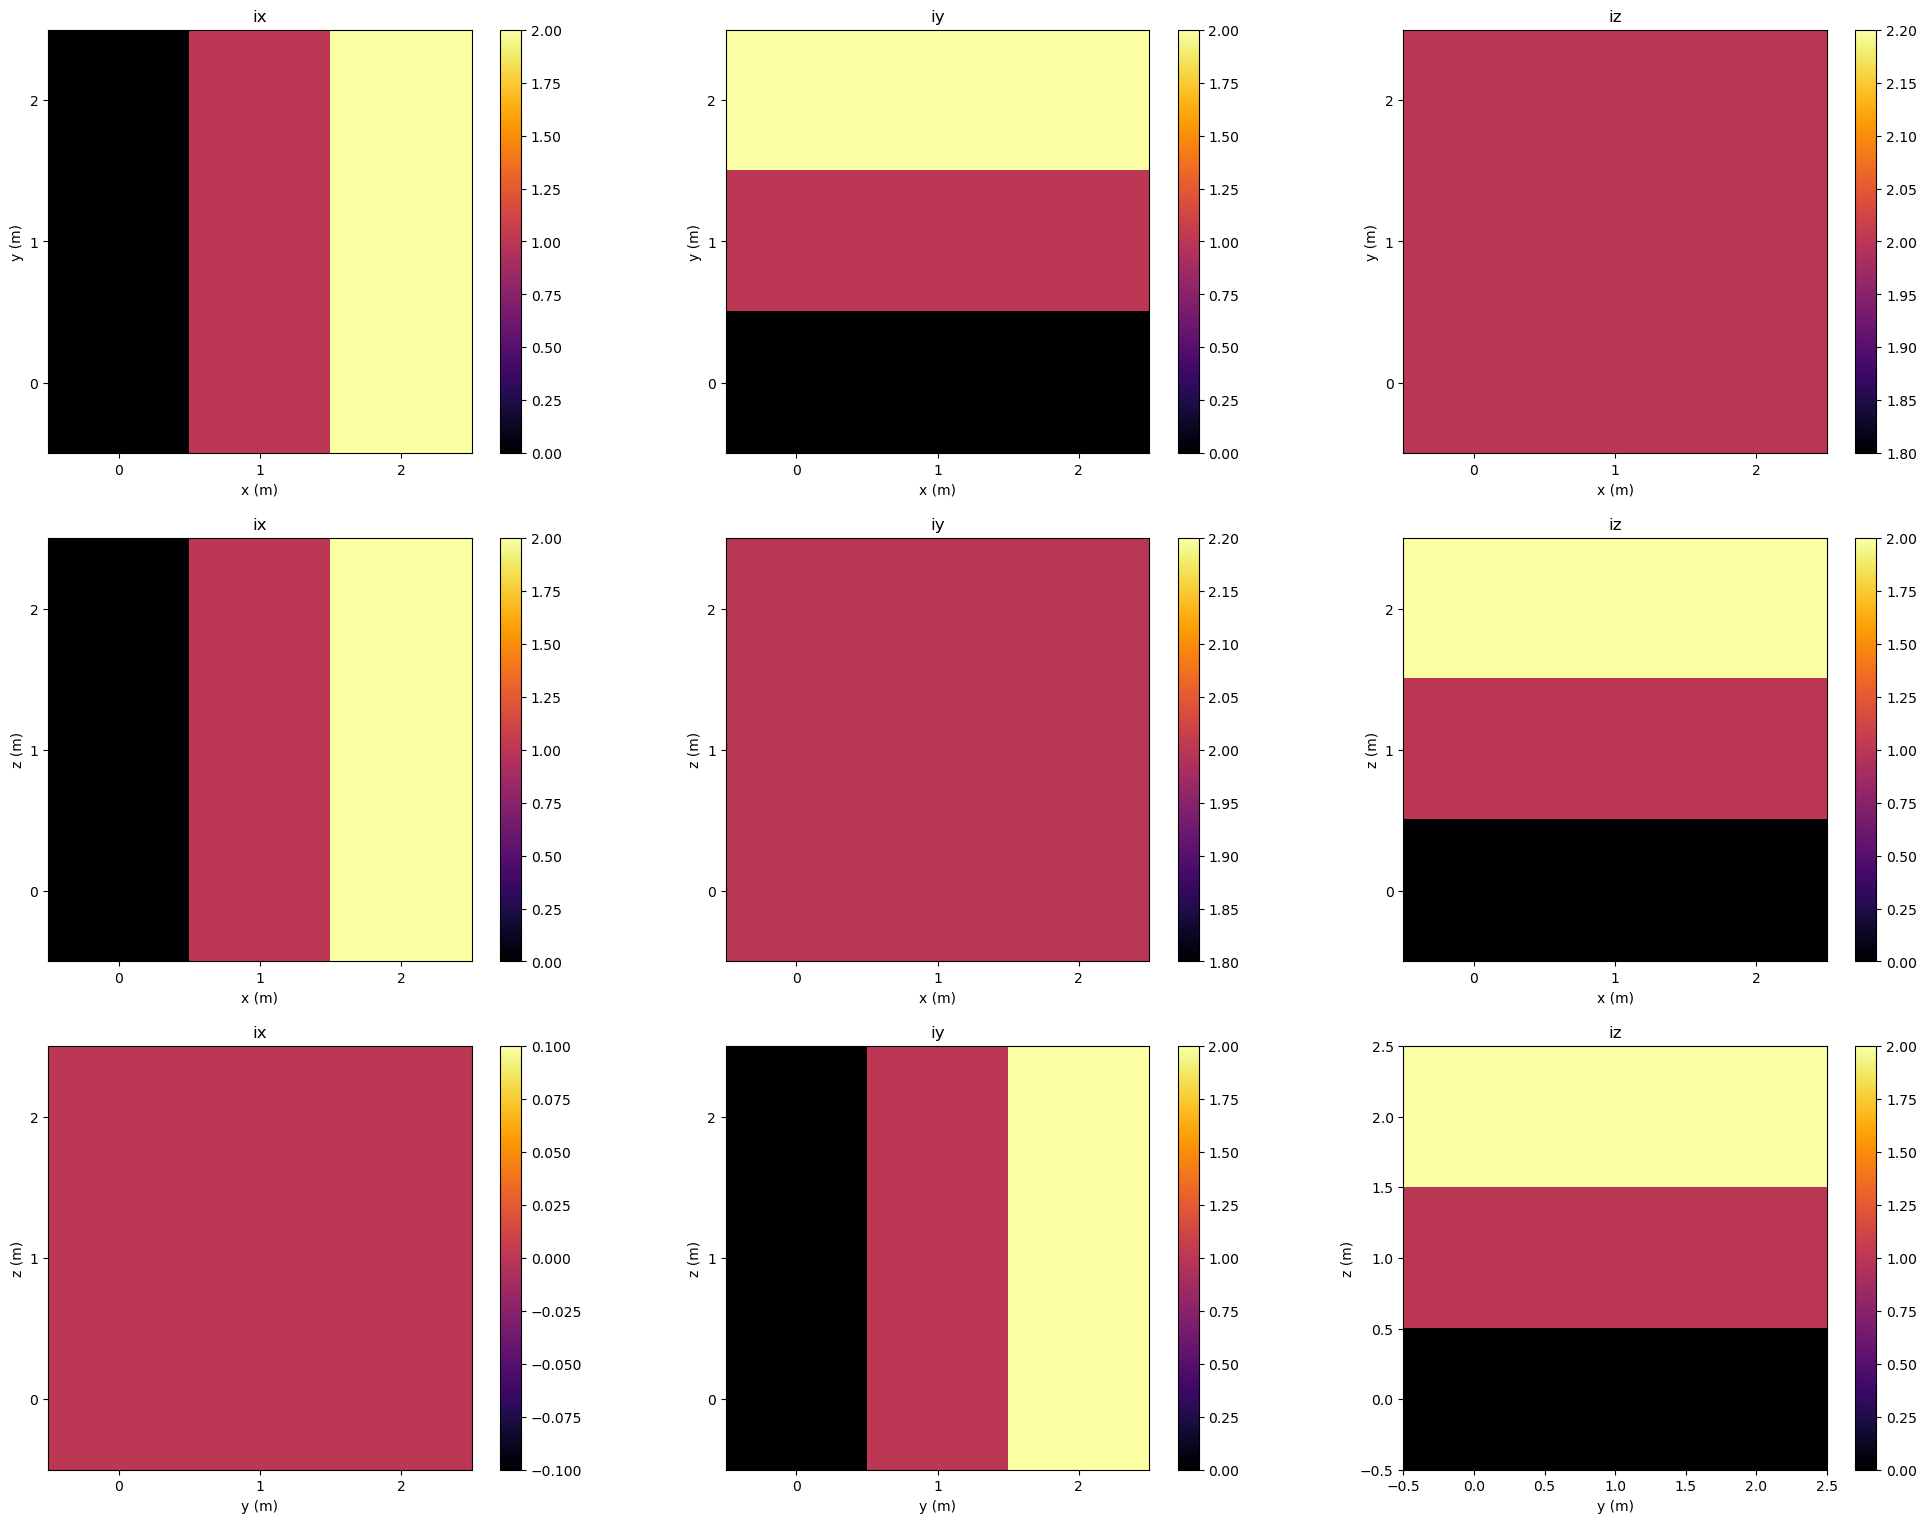

In [10]:
plt.subplot(331) # x - y slices
plt.imshow(testx[0,:,:],extent=[-0.5, 2.5,-0.5,2.5],cmap = cmap); plt.colorbar(); plt.title('ix'); plt.xlabel('x (m)'); plt.ylabel('y (m)')
plt.gca().set_xticks(ticks); plt.gca().set_yticks(ticks)

plt.subplot(332)
plt.imshow(testy[0,:,:],extent=[-0.5, 2.5,-0.5,2.5],cmap = cmap); plt.colorbar(); plt.title('iy'); plt.xlabel('x (m)'); plt.ylabel('y (m)')
plt.gca().set_xticks(ticks); plt.gca().set_yticks(ticks)

plt.subplot(333); 
plt.imshow(testz[0,:,:],extent=[-0.5, 2.5,-0.5,2.5],cmap = cmap); plt.colorbar(); plt.title('iz'); plt.xlabel('x (m)'); plt.ylabel('y (m)')
plt.gca().set_xticks(ticks); plt.gca().set_yticks(ticks)

plt.subplot(334) # x - z slices
plt.imshow(testx[:,0,:],extent=[-0.5, 2.5,-0.5,2.5],cmap = cmap); plt.colorbar(); plt.title('ix'); plt.xlabel('x (m)'); plt.ylabel('z (m)')
plt.gca().set_xticks(ticks); plt.gca().set_yticks(ticks)

plt.subplot(335)
plt.imshow(testy[:,0,:],extent=[-0.5, 2.5,-0.5,2.5],cmap = cmap); plt.colorbar(); plt.title('iy'); plt.xlabel('x (m)'); plt.ylabel('z (m)')
plt.gca().set_xticks(ticks); plt.gca().set_yticks(ticks)

plt.subplot(336)
plt.imshow(testz[:,0,:],extent=[-0.5, 2.5,-0.5,2.5],cmap = cmap); plt.colorbar(); plt.title('iz'); plt.xlabel('x (m)'); plt.ylabel('z (m)')
plt.gca().set_xticks(ticks); plt.gca().set_yticks(ticks)

plt.subplot(337) # y - z slices
plt.imshow(testx[:,:,0],extent=[-0.5, 2.5,-0.5,2.5],cmap = cmap); plt.colorbar(); plt.title('ix'); plt.xlabel('y (m)'); plt.ylabel('z (m)')
plt.gca().set_xticks(ticks); plt.gca().set_yticks(ticks)

plt.subplot(338)
plt.imshow(testy[:,::-1,0],extent=[-0.5, 2.5,-0.5,2.5],cmap = cmap); plt.colorbar(); plt.title('iy'); plt.xlabel('y (m)'); plt.ylabel('z (m)')
plt.gca().set_xticks(ticks); plt.gca().set_yticks(ticks)

plt.subplot(339)
plt.imshow(testz[:,:,0],extent=[-0.5, 2.5,-0.5,2.5],cmap = cmap); plt.colorbar(); plt.title('iz'); plt.xlabel('y (m)'); plt.ylabel('z (m)')

plt.subplots_adjust(left=0.0, bottom=0.0, right=3., top=3.0, wspace=0.2, hspace=0.2); plt.show()

#### Comments

This was a simple demonstration of 3D ndarrays and slicing for visualization. I know this is a simple concept, but it is foundamental to 3D modeling for engineering and geoscience with open source Python.
  
#### The Author:

### Michael Pyrcz, Professor, The University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)  
  